
## 📂 MRI Data Overview

## 1. Structural (Anatomical) Scans

These scans provide detailed views of brain anatomy and serve as reference images for aligning other modalities.
 - T1-weighted (T1w): High-resolution structural scan showing fine anatomical detail; good gray/white matter contrast.
 - T2-weighted (T2w): Complementary to T1w; CSF appears bright. Useful for edema or pathology.
 - High-Resolution T2w (Hippocampus): TSE_HiResHp: High-resolution scan of the hippocampal region; critical in epilepsy/neurodegeneration.
 - FLAIR (Fluid-Attenuated Inversion Recovery): FLAIR_1mm_ipat2_ORIG: Suppresses CSF signal, highlighting white matter lesions.

## 2. Functional MRI (fMRI)
These scans capture brain activity during language tasks.
- Sentence Completion Task or Word Generation Task
    - SBRef: Single-volume structural reference for motion correction.
    - Sentence_Completion: BOLD time-series (~100 volumes) during language task.
    - PhysioLog: Simultaneous physiological data (heart rate, respiration).

- Fieldmaps for fMRI: SpinEchoFieldMap_AP and SpinEchoFieldMap_PA: Used to correct spatial distortions due to magnetic susceptibility in fMRI images.

## 3. Diffusion MRI (dMRI)
Used to visualize white matter microstructure and perform tractography.
- AP Phase Encoding
    - dMRI_dir98_AP_SBref: Structural reference volume.
    - dMRI_dir98_AP: Main diffusion scan (~99 directions).
    - PhysioLog: Auxiliary, not typically required.

- PA Phase Encoding
    - dMRI_dir99_PA: Reverse phase-encoded diffusion scan.

## 4. Perfusion Imaging (ASL - Arterial Spin Labeling)
Provides measurements of cerebral blood flow (CBF).

- mbPCASLhr_PA: Pseudocontinuous ASL sequence including M0 image. (Main ASL Sequence)
- Fieldmaps for ASL: SpinEchoFieldMap_AP and SpinEchoFieldMap_PA

```text
MRI Data
├── 1. Structural (Anatomical) Scans
│   ├── T1-weighted (T1w)
│   │   ├── (2 - T1w_MPR): Initial T1w scan
│   │   └── 3 - T1w_MPR: Derived, convert
│   ├── T2-weighted (T2w)
│   │   ├── (4 - T2w_SPC): Initial T2w scan
│   │   └── 5 - T2w_SPC: Derived, convert
│   ├── High-Resolution T2w for Hippocampus
│   │   ├── (6 - TSE_HiResHp): Raw HiRes scan
│   │   └── 7 - TSE_HiResHp: Derived, convert
│   └── FLAIR (Fluid-Attenuated Inversion Recovery)
│       ├── (27 - 32_FLAIR_1mm_ipat2_ORIG): Raw series
│       └── 28 - 32_FLAIR_1mm_ipat2: Derived, convert
│
├── 2. Functional MRI (fMRI)
│   ├── Language Task: Sentence Completion
│   │   ├── (8 - Sentence_Completion_SBRef): Structural reference for motion correction
│   │   └── 9 - Sentence_Completion, convert (~100 volumes)
│   │   └── (10 - PhysioLog): Physiological recording
│   ├── Language Task: Word Generation
│   │   ├── (11,13 - Word Generation): Auxiliary
│   │   └── 12 - Word_Generation:convert
│   └── Fieldmaps (for fMRI distortion correction)
│       ├── 14 - SpinEchoFieldMap_AP
│       └── 15 - SpinEchoFieldMap_PA
│
├── 3. Diffusion MRI (dMRI)
│   ├── Phase Encoding Direction: AP
│   │   ├── (16 - dMRI_dir98_AP_SBref): Structural reference
│   │   └── 17 - dMRI_dir98_AP: convert (~99 volumes)
│   │   └── (18 - PhysioLog): Not required
│   ├── Phase Encoding Direction: PA
│   │   ├── (19,21 - Others): Auxiliary
│   │   └── 20 - dMRI_dir99_PA: convert (~100 volumes)
│   └── (22-26 - Processed): Skip
│
├── 4. Perfusion (ASL)
│   ├── (29-33 - Localizer): Not required
│   ├── 34 - mbPCASLhr_PA: Main ASL sequence (includes M0 image)
│   └── Fieldmaps (for ASL distortion correction)
│       ├── 35 - SpinEchoFieldMap_AP
│       └── 36 - SpinEchoFieldMap_PA
│
└── (1 - Localizer): Planning scan, not required
```
The number of series could change for different scans. The last derived images are the ones we aim to use. Sometimes the first scans might have been aborted for any reasons. Rely on descriptions in the header file. Need to correct them using the SpinEcho files and need to know which ones goes with ASL or fMRI. Check the animation visualization of 100 volumes. 

# DICOM MRI Data Analysis and BIDS Conversion Planning

This notebook provides an analysis of DICOM MRI file headers, identifies the extracted scans from original ones (Derived), and converts data to the Brain Imaging Data Structure (BIDS) format. The analysis is based on sample JSON header files extracted from a patient's DICOM dataset.

This notebook analyzes the JSON sidecar files (extracted from DICOM headers by dcm2niix) located in the `/home/amin/MRIProjects/data/` directory. The goal is to understand the different MRI scan types present, identify key characteristics, and inform the BIDS conversion process.

## 1. Introduction to DICOM Headers and BIDS

DICOM (Digital Imaging and Communications in Medicine) is the standard for handling, storing, printing, and transmitting information in medical imaging. Each DICOM file contains not only image data but also a rich set of metadata in its header, describing acquisition parameters, patient information, and image characteristics.

BIDS is a community-driven standard for organizing neuroimaging data. It provides a clear and consistent way to structure datasets, making them easier to share, analyze, and reuse. Converting raw MRI data to BIDS involves extracting relevant information from DICOM headers and organizing files into a predefined directory structure with standardized naming conventions.

## 2. Sample DICOM Header Analysis

Below are selected JSON header contents from the provided patient's MRI scans. We will examine key fields to understand the different modalities and identify the "Derived" images.

### Sample 1: T1w MPR (Series 3)
This scan is identified as a T1-weighted MPR (Magnetization Prepared Rapid Gradient Echo) sequence.
```json
{
	"Modality": "MR",
	"MagneticFieldStrength": 3,
	"ImagingFrequency": 123.248988,
	"Manufacturer": "Siemens",
	"ManufacturersModelName": "Prisma_fit",
	"InstitutionName": "Queens University",
	"InstitutionalDepartmentName": "Department",
	"InstitutionAddress": "Botterall Hall  234,Kingston,Ontario,CA,K7L3N6",
	"DeviceSerialNumber": "167084",
	"StationName": "MRC35109",
	"BodyPartExamined": "BRAIN",
	"PatientPosition": "HFS",
	"ProcedureStepDescription": "Winston^fMRI",
	"SoftwareVersions": "syngo MR E11",
	"MRAcquisitionType": "3D",
	"SeriesDescription": "T1w_MPR",
	"ProtocolName": "T1w_MPR",
	"ScanningSequence": "GR\\\\IR",
	"SequenceVariant": "SK\\\\SP\\\\MP",
	"ScanOptions": "IR\\\\WE",
	"SequenceName": "*tfl3d1_16ns",
	"ImageType": ["ORIGINAL", "PRIMARY", "M", "ND", "NORM"],
	"NonlinearGradientCorrection": false,
	"SeriesNumber": 3,
	"AcquisitionTime": "12:10:6.487500",
	"AcquisitionNumber": 1,
	"SliceThickness": 0.8,
	"SAR": 0.0364327,
	"EchoTime": 0.00222,
	"RepetitionTime": 2.5,
	"SpoilingState": true,
	"InversionTime": 1,
	"FlipAngle": 8,
	"PartialFourier": 1,
	"BaseResolution": 320,
	"ShimSetting": [4724, 5719, 706, 324, -29, -71,	-31, -81],
	"TxRefAmp": 252.558,
	"PhaseResolution": 1,
	"ReceiveCoilName": "Head_32",
	"ReceiveCoilActiveElements": "HEA;HEP",
	"PulseSequenceDetails": "%SiemensSeq%\\\\tfl",
	"RefLinesPE": 32,
	"CoilCombinationMethod": "Adaptive Combine",
	"ConsistencyInfo": "N4_VE11E_LATEST_20181129",
	"MatrixCoilMode": "GRAPPA",
	"PercentPhaseFOV": 93.75,
	"PercentSampling": 100,
	"PhaseEncodingSteps": 299,
	"AcquisitionMatrixPE": 300,
	"ReconMatrixPE": 300,
	"ParallelReductionFactorInPlane": 2,
	"PixelBandwidth": 220,
	"DwellTime": 7.1e-06,
	"ImageOrientationPatientDICOM": [0,	1, 0, 0, 0,	-1],
	"ImageOrientationText": "Sag",
	"InPlanePhaseEncodingDirectionDICOM": "ROW",
	"BidsGuess": ["anat","_acq-tfl3p2_run-3_T1w"],
	"ConversionSoftware": "dcm2niix",
	"ConversionSoftwareVersion": "v1.0.20240202"
}
```

```json
# Sample 2:
{"SeriesDescription": "FLAIR_TRA",
"ProtocolName": "32_FLAIR_1mm_ipat2",
ImageType": ["DERIVED", "SECONDARY", "MPR", "CSA MPR", "CSAPARALLEL", "M", "ND", "NORM", "FM", "FIL"],	
"RawImage": false}

# Sample 3:
{"SeriesDescription": "32_FLAIR_1mm_ipat2_ORIG",
"ProtocolName": "32_FLAIR_1mm_ipat2",
"ImageType": ["ORIGINAL", "PRIMARY", "M", "ND", "NORM"]}

# Sample 4:
{"SeriesDescription": "AAHScout_MPR_sag",
"ProtocolName": "AAHScout",
"ImageType": ["DERIVED", "PRIMARY", "MPR", "ND", "NORM"],
"RawImage": false}
``` 
Read each JSON file and extract key metadata fields like `SeriesNumber`, `SeriesDescription`, `ProtocolName`, `ImageType`, `ScanningSequence`, `SequenceVariant`, etc. Compile this information into a pandas DataFrame for easy viewing and analysis. Extract all the series numbers whose "ImageType" contains "DERIVED" information or the "RawImage" is "false". Use SpinEchoFieldMap files to correct the MRI images.

Analyze JSON Headers: I will read the content of the provided JSON files to extract key information like `SeriesDescription`, `ProtocolName`, `ImageType`, "RawImage", and other relevant fields to understand each scan type. We check the Series of each modality; 

We follow a priority-based selection strategy for each modality:
- Convert the last available series with ImageType containing ["DERIVED", "SECONDARY"].
- If unavailable, fall back to a ["DERIVED", "PRIMARY"] series.
- If neither is found, convert the ["ORIGINAL", "PRIMARY"] series.
This ensures we process the final, derived scans intended for analysis (e.g., normalized, motion-corrected) while skipping raw or aborted acquisitions.

## 3. Extracting and Summarizing Key Information

We'll use Python to parse the JSON data and extract relevant fields for a structured overview.

```python
import json
import pandas as pd

# Sample JSON data (replace with actual file reading in a real scenario)
json_data = {
    "T1w_MPR_normalized": {
        "Modality": "MR",
        "SeriesDescription": "T1w_MPR",
        "ProtocolName": "T1w_MPR",
        "SeriesNumber": 3,
        "ImageType": ["ORIGINAL", "PRIMARY", "M", "ND", "NORM"],
        "EchoTime": 0.00222,
        "RepetitionTime": 2.5,
        "FlipAngle": 8
    }
}

data_summary = []
for key, data in json_data.items():
    image_type = data.get("ImageType", [])
    is_derived = "DERIVED" in image_type
    is_normalized = "NORM" in image_type or "CSA MPR" in image_type

    data_summary.append({
        "Scan Name": key,
        "Series Number": data.get("SeriesNumber"),
        "Series Description": data.get("SeriesDescription"),
        "Protocol Name": data.get("ProtocolName"),
        "Modality": data.get("Modality"),
        "Image Type": ", ".join(image_type),
        "Is Derived": is_derived,
        "Is Normalized": is_normalized,
        "Echo Time (s)": data.get("EchoTime"),
        "Repetition Time (s)": data.get("RepetitionTime"),
        "Flip Angle (deg)": data.get("FlipAngle")
    })


df = pd.DataFrame(data_summary)
print(df.to_markdown(index=False))
```
## 4. BIDS Conversion Configuration (`dcm2bids_config.json`)

The following JSON configuration file is designed for `dcm2bids` to convert the DICOM data into a BIDS-compliant dataset. It specifies criteria for identifying different scan types and how they should be named and organized within the BIDS structure. Only the primary, relevant scans (including normalized anatomical images) are included in this configuration.

```json
{
  "descriptions": [
    {
      "dataType": "anat",
      "modalityLabel": "T1w",
      "criteria": {
        "SeriesDescription": ".*T1w_MPR.*",
        "ImageType": ["DERIVED", "NORM"]
      },
      "sidecarChanges": {
        "TaskName": "structural"
      }
    },
    {
      "dataType": "fmap",
      "modalityLabel": "fieldmap",
      "criteria": {
        "SeriesDescription": ".*SpinEchoFieldMap.*"
      }
    }
  ]
}

```

Visualizing the insight into the distribution of sequences:
```python
import matplotlib.pyplot as plt
df['Series Description'].value_counts().plot(kind='barh', figsize=(10, 6), title='Scan Types Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()
```


## 5. Convert DICOMs to NIfTI and Extract Headers (using dcm2niix)

This step converts DICOM files from the source directory to NIfTI format and extracts associated header information into JSON sidecar files. These JSON files are then used for further analysis and BIDS conversion.

**Note:** Ensure `dcm2niix` is installed and accessible in your system's PATH. If not, you may need to install it (e.g., via `conda install -c conda-forge dcm2niix`).

To proceed with the actual BIDS conversion, you would typically place your raw DICOM files in an input directory (e.g., `/data/`), the `dcm2bids_config.json` file in your working directory, and then run the `dcm2bids` command as follows:

```bash
dcm2bids -d data/ -p P013 -s 01 -c dcm2bids_config.json -o bids_output --clobber --force_dcm2bids
```

After successful conversion, the `bids_output` directory will contain your data organized according to the BIDS standard, ready for further neuroimaging analysis pipelines.

In [6]:
import os
import json
import pandas as pd
import glob
import subprocess

# Set display options for pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 150)

dicom_input_dir = os.path.expanduser('~/MRIProjects/data/')
patient_output_dir = os.path.expanduser('/home/amin/MRIProjects/bids_output/tmp_dcm2bids/sub-P013_ses-01')

print(f"Converting DICOMs from {dicom_input_dir} to NIfTI and JSON in {patient_output_dir}...")
os.makedirs(dicom_input_dir, exist_ok=True) # Ensure input directory exists
os.makedirs(patient_output_dir, exist_ok=True)

print("Starting DICOM conversion...")
processed_any_dicoms = False
series_dirs_to_process = set()

# Find all directories that contain DICOM files
for root, dirs, files in os.walk(dicom_input_dir):
    if any(f.endswith(('.dcm', '.IMA')) for f in files):
        series_dirs_to_process.add(root)

if not series_dirs_to_process:
    print(f"No directories containing DICOM files found in {dicom_input_dir} or its subdirectories. Please ensure the path is correct and contains valid DICOMs.")
else:
    for series_dir in sorted(list(series_dirs_to_process)): # Sort for consistent processing order
        print(f"Processing DICOMs in series directory: {series_dir}")
        # Construct the dcm2niix command for the current series directory
        command = [
            "dcm2niix",
            "-r", "y",
            "-f", "%n_%p_%t",
            "-o", patient_output_dir,
            "-b", "y",
            "-z", "y",
            series_dir
        ]
        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, capture_output=True, text=True, check=True)
            print(result.stdout)
            if result.stderr:
                print(f"dcm2niix stderr: {result.stderr}")
            processed_any_dicoms = True
        except subprocess.CalledProcessError as e:
            print(f"Error executing dcm2niix: {e}")
            print(f"Stdout: {e.stdout}")
            print(f"Stderr: {e.stderr}")
        except FileNotFoundError:
            print("Error: dcm2niix command not found. Please ensure it's installed and in your system's PATH.")

if processed_any_dicoms:
    print("DICOM conversion complete. JSON sidecar files are now available for analysis.")
else:
    print("No DICOM files were successfully converted.")

# Update patient_dir to point to the newly generated JSON files
patient_dir = patient_output_dir


Converting DICOMs from /home/amin/MRIProjects/data/ to NIfTI and JSON in /home/amin/MRIProjects/bids_output/tmp_dcm2bids/sub-P013_ses-01...
Starting DICOM conversion...
Processing DICOMs in series directory: /home/amin/MRIProjects/data/
Executing: dcm2niix -r y -f %n_%p_%t -o /home/amin/MRIProjects/bids_output/tmp_dcm2bids/sub-P013_ses-01 -b y -z y /home/amin/MRIProjects/data/
Chris Rorden's dcm2niiX version v1.0.20241211  GCC13.3.0 x86-64 (64-bit Linux)
Converted 4454 DICOMs
Conversion required 0.615421 seconds (0.615350 for core code).

DICOM conversion complete. JSON sidecar files are now available for analysis.


In [10]:
# Find all JSON files generated
patient_output_dir = os.path.expanduser('/home/amin/MRIProjects/bids_output/tmp_dcm2bids/sub-P013_ses-01')
json_files = glob.glob(os.path.join(patient_output_dir, '*.json'))

print(f"\nFound {len(json_files)} JSON sidecar files. Sample files:")
for jf in json_files[:5]:
    print(" -", os.path.basename(jf))

# Optional: Load and display basic fields from the first few JSONs
sample_entries = []
for jf in json_files[:]:
    try:
        with open(jf, 'r') as f:
            jdata = json.load(f)
        sample_entries.append({
            "File": os.path.basename(jf),
            "SeriesDescription": jdata.get("SeriesDescription", "N/A"),
            "ProtocolName": jdata.get("ProtocolName", "N/A"),
            "ImageType": jdata.get("ImageType", []),
            "SeriesNumber": jdata.get("SeriesNumber", "N/A"),
            "Modality": jdata.get("Modality", "N/A"),
            "RawImage": jdata.get("RawImage", None)
        })
    except Exception as e:
        print(f"Could not read {jf}: {e}")

# Convert to DataFrame for inspection
json_df = pd.DataFrame(sample_entries)
print("\nPreview of Converted JSON Headers:")
print(json_df.head(57).to_string(index=False))


Found 57 JSON sidecar files. Sample files:
 - 027_Patient_32_FLAIR_1mm_ipat2_20240116120032.json
 - 004_Patient_T2w_SPC_20240116120032.json
 - 008_Patient_fMRI_-_Sentence_Completion_20240116120032.json
 - 035_Patient_mbPCASLhr_PA_20240116120032.json
 - 103_Patient_T2w_SPC_20240116120032.json

Preview of Converted JSON Headers:
                                                       File                SeriesDescription                ProtocolName                                                                            ImageType  SeriesNumber Modality RawImage
         027_Patient_32_FLAIR_1mm_ipat2_20240116120032.json          32_FLAIR_1mm_ipat2_ORIG          32_FLAIR_1mm_ipat2                                          [ORIGINAL, PRIMARY, M, ND, NORM, MAGNITUDE]            27       MR     None
                    004_Patient_T2w_SPC_20240116120032.json                          T2w_SPC                     T2w_SPC                                                [ORIGINAL, PRIMARY, M, ND,

In [20]:
import os
import json
import glob
import pandas as pd

# Directory containing converted JSON files
json_dir = os.path.expanduser('/home/amin/MRIProjects/bids_output/tmp_dcm2bids/sub-P013_ses-01')

# Find all JSON sidecar files
json_files = glob.glob(os.path.join(json_dir, '*.json'))

# List to store parsed JSON data
derived_headers = []

# Parse each JSON file and filter by 'DERIVED' in ImageType
for file_path in json_files:
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        image_type = data.get("ImageType", [])
        if isinstance(image_type, list) and "DERIVED" in image_type:
            derived_headers.append({
                "File": os.path.basename(file_path),
                "SeriesNumber": data.get("SeriesNumber"),
                "SeriesDescription": data.get("SeriesDescription"),
                "ProtocolName": data.get("ProtocolName"),
                "ImageType": ", ".join(image_type),
                "Modality": data.get("Modality"),
                "RawImage": data.get("RawImage", None)
            })
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Convert to DataFrame, sort by SeriesNumber and display
derived_df = pd.DataFrame(derived_headers)
derived_df = derived_df.sort_values(by="SeriesNumber")

# Convert to DataFrame and display
print(len(derived_df), "derived images found with 'DERIVED' in ImageType.")
print("\n=== Derived Image Headers ===")
print(derived_df.to_markdown(index=False))

26 derived images found with 'DERIVED' in ImageType.

=== Derived Image Headers ===
| File                                                |   SeriesNumber | SeriesDescription    | ProtocolName       | ImageType                                                                          | Modality   | RawImage   |
|:----------------------------------------------------|---------------:|:---------------------|:-------------------|:-----------------------------------------------------------------------------------|:-----------|:-----------|
| 022_Patient_dMRI_dir99_PA_20240116120032.json       |             22 | dMRI_dir99_PA_ADC    | dMRI_dir99_PA      | DERIVED, PRIMARY, DIFFUSION, ADC, MB, ND                                           | MR         | False      |
| 023_Patient_dMRI_dir99_PA_20240116120032.json       |             23 | dMRI_dir99_PA_TRACEW | dMRI_dir99_PA      | DERIVED, PRIMARY, DIFFUSION, TRACEW, MB, ND                                        | MR         | False      |
| 02

In [27]:
import os
import json
import glob
import pandas as pd

# Directory containing converted JSON files
json_dir = os.path.expanduser('/home/amin/MRIProjects/bids_output/tmp_dcm2bids/sub-P013_ses-01')

# Find all JSON sidecar files
json_files = glob.glob(os.path.join(json_dir, '*.json'))

# Parse and group JSON metadata by (SeriesDescription, ProtocolName)
scan_groups = {}

for file_path in json_files:
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)

        image_type = data.get("ImageType", [])
        series_description = data.get("SeriesDescription", "Unknown")
        protocol_name = data.get("ProtocolName", "Unknown")
        series_number = data.get("SeriesNumber", -1)

        key = (series_description, protocol_name)

        if key not in scan_groups:
            scan_groups[key] = []

        scan_groups[key].append({
            "SeriesNumber": series_number,
            "File": os.path.basename(file_path),
            "SeriesDescription": series_description,
            "ProtocolName": protocol_name,
            "ImageType": image_type,
            "Modality": data.get("Modality"),
            "RawImage": data.get("RawImage", None)
        })

    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Apply priority-based selection
selected_scans = []

for key, scans in scan_groups.items():
    scans_sorted = sorted(scans, key=lambda x: x['SeriesNumber'], reverse=True)
    
    derived_secondary = next((s for s in scans_sorted if set(["DERIVED", "SECONDARY"]).issubset(set(s["ImageType"]))), None)
    derived_primary = next((s for s in scans_sorted if set(["DERIVED", "PRIMARY"]).issubset(set(s["ImageType"]))), None)
    original_primary = next((s for s in scans_sorted if set(["ORIGINAL", "PRIMARY"]).issubset(set(s["ImageType"]))), None)

    selected = derived_secondary or derived_primary or original_primary
    if selected:
        selected["ImageType"] = ", ".join(selected["ImageType"])
        selected_scans.append(selected)

# Convert to DataFrame, sort by SeriesNumber and display
selected_df = pd.DataFrame(selected_scans)
selected_df = selected_df.sort_values(by="SeriesNumber")


print(len(selected_df), "derived images found with 'DERIVED' in ImageType.")
print("\n=== Derived Image Headers ===")
print(selected_df.to_markdown(index=False))

# Priority-based selection strategy can be applied next in further processing:
# 1. Prefer ["DERIVED", "SECONDARY"]
# 2. Then ["DERIVED", "PRIMARY"]
# 3. Finally ["ORIGINAL", "PRIMARY"]
# This code prepares the data for that decision logic.


34 derived images found with 'DERIVED' in ImageType.

=== Derived Image Headers ===
|   SeriesNumber | File                                                        | SeriesDescription                | ProtocolName                | ImageType                                                                          | Modality   | RawImage   |
|---------------:|:------------------------------------------------------------|:---------------------------------|:----------------------------|:-----------------------------------------------------------------------------------|:-----------|:-----------|
|              3 | 003_Patient_T1w_MPR_20240116120032.json                     | T1w_MPR                          | T1w_MPR                     | ORIGINAL, PRIMARY, M, ND, NORM, MAGNITUDE                                          | MR         |            |
|              5 | 005_Patient_T2w_SPC_20240116120032.json                     | T2w_SPC                          | T2w_SPC                     |

## 1. Load Data from JSON Files

Iterate through all `.json` files in the `~/MRIProjects/data/` directory, read their contents, and extract relevant metadata into a list.

In [28]:
#json_files = glob.glob(os.path.join(patient_dir, '*.json'))
json_files =glob.glob(os.path.join('bids_output/tmp_dcm2bids/sub-P013_ses-01','*.json'))

scan_data = []
for json_file in json_files:
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
            data['FilePath'] = json_file # Add file path for later reference
            scan_data.append(data)
    except json.JSONDecodeError:
        print(f"Error decoding JSON from {json_file}")
    except Exception as e:
        print(f"An error occurred while reading {json_file}: {e}")

# Sanitize missing keys
for item in scan_data:
    item['ImageType'] = item.get('ImageType', [])
    item['RawImage'] = item.get('RawImage', True)
    item['SeriesDescription'] = item.get('SeriesDescription', 'Unknown')
    item['SeriesNumber'] = item.get('SeriesNumber', -1)

df = pd.DataFrame(scan_data)

print(f"Found {len(df)} JSON sidecar files.")
df

Found 57 JSON sidecar files.


,Modality,MagneticFieldStrength,ImagingFrequency,Manufacturer,ManufacturersModelName,InstitutionName,InstitutionalDepartmentName,InstitutionAddress,DeviceSerialNumber,StationName,BodyPart,PatientPosition,ProcedureStepDescription,SoftwareVersions,MRAcquisitionType,StudyDescription,SeriesDescription,ProtocolName,ScanningSequence,SequenceVariant,ScanOptions,SequenceName,ImageType,NonlinearGradientCorrection,SeriesNumber,...,ReconMatrixPE,ParallelReductionFactorInPlane,PixelBandwidth,DwellTime,ImageOrientationPatientDICOM,ImageOrientationText,InPlanePhaseEncodingDirectionDICOM,BidsGuess,ConversionSoftware,ConversionSoftwareVersion,FilePath,RawImage,ImageComments,SpacingBetweenSlices,WipMemBlock,BandwidthPerPixelPhaseEncode,EffectiveEchoSpacing,DerivedVendorReportedEchoSpacing,TotalReadoutTime,PhaseEncodingDirection,SliceTiming,MultibandAccelerationFactor,DiffusionScheme,PhaseOversampling,VendorReportedEchoSpacing
0,MR,3.0,123.249007,Siemens,Prisma_fit,Queens University,Department,"Botterall Hall 234,Kingston,Ontario,CA,K7L3N6",167084,MRC35109,BRAIN,HFS,Winston^fMRI,syngo MR E11,3D,Winston^fMRI,32_FLAIR_1mm_ipat2_ORIG,32_FLAIR_1mm_ipat2,SE\IR,SK\SP\MP,IR\PFP,*spcir_310ns,"[ORIGINAL, PRIMARY, M, ND, NORM, MAGNITUDE]",False,27,...,256,2.0,780.0,0.000003,"[0, 1, 0, 0, 0, -1]",Sag,ROW,"[anat, _acq-spcir3p2_run-27_FLAIR]",dcm2niix,v1.0.20241211,bids_output/tmp_dcm2bids/sub-P013_ses-01/027_Patient_32_FLAIR_1mm_ipat2_20240116120032.json,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MR,3.0,123.248988,Siemens,Prisma_fit,Queens University,Department,"Botterall Hall 234,Kingston,Ontario,CA,K7L3N6",167084,MRC35109,BRAIN,HFS,Winston^fMRI,syngo MR E11,3D,Winston^fMRI,T2w_SPC,T2w_SPC,SE,SK\SP,PFP,*spc_314ns,"[ORIGINAL, PRIMARY, M, ND, MAGNITUDE]",False,4,...,300,2.0,745.0,0.000002,"[0, 1, 0, 0, 0, -1]",Sag,ROW,"[anat, _acq-spc3p2_run-4_T2w]",dcm2niix,v1.0.20241211,bids_output/tmp_dcm2bids/sub-P013_ses-01/004_Patient_T2w_SPC_20240116120032.json,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MR,3.0,123.248990,Siemens,Prisma_fit,Queens University,Department,"Botterall Hall 234,Kingston,Ontario,CA,K7L3N6",167084,MRC35109,BRAIN,HFS,Winston^fMRI,syngo MR E11,2D,Winston^fMRI,fMRI - Sentence Completion_SBRef,fMRI - Sentence Completion,EP,SK\SS,FS\EXT,epfid2d1_64,"[ORIGINAL, PRIMARY, M, ND, MOSAIC, MAGNITUDE]",False,8,...,64,NaN,2005.0,0.000004,"[1, 0, 0, 0, 0.946085, -0.323917]",Tra>Cor(-18.9),COL,"[func, _acq-epfid2_dir-AP_run-8_bold]",dcm2niix,v1.0.20241211,bids_output/tmp_dcm2bids/sub-P013_ses-01/008_Patient_fMRI_-_Sentence_Completion_20240116120032.json,True,Single-band reference,3.000,d00ab8f3-b60e-4860-b7ef-cc94eae4c01e||Sequence: R016 ve11e/master r/434b28f1; Aug 7 2019 18:53:46 by eja,27.902,0.00056,0.00056,0.03528,j-,"[0, 0.0975, 0.1975, 0.2975, 0.395, 0.495, 0.595, 0.6925, 0.7925, 0.8925, 0.99, 1.09, 1.19, 1.2875, 1.3875, 1.4875, 1.585, 1.685, 1.785, 1.8825, 1....",NaN,NaN,NaN,NaN
3,MR,3.0,123.249017,Siemens,Prisma_fit,Queens University,Department,"Botterall Hall 234,Kingston,Ontario,CA,K7L3N6",167084,MRC35109,BRAIN,HFS,Winston^fMRI,syngo MR E11,2D,Winston^fMRI,mbPCASLhr_PA,mbPCASLhr_PA,EP,SK,PFP\FS,mbPCASL2d1_86,"[ORIGINAL, PRIMARY, M, ND, MOSAIC, MAGNITUDE]",False,35,...,86,NaN,2325.0,0.000003,"[0.981861, 0.0319757, 0.186886, -0.000171399, 0.985826, -0.167772]",Tra>Sag(11.1)>Cor(-9.5),COL,"[perf, _acq-mbPCASL2m6_run-35_asl]",dcm2niix,v1.0.20241211,bids_output/tmp_dcm2bids/sub-P013_ses-01/035_Patient_mbPCASLhr_PA_20240116120032.json,True,NaN,2.497,NaN,20.400,0.00057,0.00057,0.04845,j,"[0, 0.0575, 0.1175, 0.1775, 0.235, 0.295, 0.3525, 0.4125, 0.4725, 0.53, 0, 0.0575, 0.1175, 0.1775, 0.235, 0.295, 0.3525, 0.4125, 0.4725, 0.53, 0, ...",6.0,NaN,NaN,NaN
4,MR,3.0,123.248988,Siemens,Prisma_fit,Queens University,Department,"Botterall Hall 234,Kingston,Ontario,CA,K7L3N6",167084,MRC35109,BRAIN,HFS,NaN,syngo MR E11,3D,Winston^fMRI,T2_COR,T2w_SPC,SE,SK\SP,PFP,*spc_314ns,"[DERIVED, SECONDARY, MPR, CSA MPR, CSAPARALLEL, M, ND, NORM,

## 2. Analysis and BIDS Mapping Notes

Based on the table above, we can identify the different modalities and characteristics:

*   **Normalization:** The `ImageType` field often contains `NORM`. We specifically looked for this in T1w, T2w, and FLAIR sequences to identify potentially pre-processed anatomical scans.
    *   T1w: Series 3 appears normalized.
    *   T2w: Series 5 appears normalized.
    *   FLAIR: Series 28 appears normalized and filtered.
    *   TSE: Series 7 appears normalized.

*   **Modalities Identified:**
    *   Anatomical (T1w, T2w, FLAIR, TSE)
    *   Functional (Sentence Completion, Word Generation tasks, including SBRefs)
    *   Diffusion (AP and PA directions, including SBRefs and derived maps like ADC, FA)
    *   Field Maps (AP/PA EPI pairs for general use and specific pairs for ASL)
    *   Perfusion (PCASL)
    *   Localizers/Scouts (various types, generally excluded from BIDS)

*   **Derived Images:** Series numbers >= 100 and derived DWI maps (ADC, FA, etc.) are typically generated by the scanner or conversion software and are usually not included in the primary BIDS structure.

### Final `dcm2bids_config.json`

The following configuration was created based on this analysis to select the desired scans and map them to the BIDS structure:


In [6]:
# This section will generate the dcm2bids_config.json based on the analysis.
# Using the simplified config from previous steps.
dcm2bids_config = {
  "descriptions": [
    {
      "dataType": "anat",
      "modalityLabel": "T1w",
      "criteria": {
        "SeriesDescription": "T1w_MPR",
        "SeriesNumber": 3
      },
      "sidecarChanges": {
        "SeriesDescription": "T1w_MPR_normalized"
      }
    },
    {
      "dataType": "anat",
      "modalityLabel": "T2w",
      "criteria": {
        "SeriesDescription": "T2w_SPC",
        "SeriesNumber": 5
      },
      "sidecarChanges": {
        "SeriesDescription": "T2w_SPC_normalized"
      }
    },
    {
      "dataType": "anat",
      "modalityLabel": "FLAIR",
      "criteria": {
        "SeriesDescription": "32_FLAIR_1mm_ipat2",
        "SeriesNumber": 28
      },
      "sidecarChanges": {
        "SeriesDescription": "FLAIR_normalized_filtered"
      }
    },
    {
      "dataType": "anat",
      "modalityLabel": "T2w",
      "customLabels": "acq-HiResHp",
      "criteria": {
        "SeriesDescription": "TSE_HiResHp",
        "SeriesNumber": 7
      },
      "sidecarChanges": {
        "SeriesDescription": "TSE_HiResHp_normalized"
      }
    },
    {
      "dataType": "func",
      "modalityLabel": "bold",
      "customLabels": "task-SentenceCompletion_dir-AP",
      "criteria": {
        "SeriesDescription": "fMRI - Sentence Completion",
        "SeriesNumber": 9
      }
    },
    {
      "dataType": "func",
      "modalityLabel": "sbref",
      "customLabels": "task-SentenceCompletion_dir-AP",
      "criteria": {
        "SeriesDescription": "fMRI - Sentence Completion_SBRef",
        "SeriesNumber": 8
      }
    },
    {
      "dataType": "func",
      "modalityLabel": "bold",
      "customLabels": "task-WordGeneration_dir-AP",
      "criteria": {
        "SeriesDescription": "fMRI - Word Generation",
        "SeriesNumber": 12
      }
    },
    {
      "dataType": "func",
      "modalityLabel": "sbref",
      "customLabels": "task-WordGeneration_dir-AP",
      "criteria": {
        "SeriesDescription": "fMRI - Word Generation_SBRef",
        "SeriesNumber": 11
      }
    },
    {
      "dataType": "dwi",
      "modalityLabel": "dwi",
      "customLabels": "dir-AP",
      "criteria": {
        "SeriesDescription": "dMRI_dir98_AP",
        "SeriesNumber": 17
      }
    },
    {
      "dataType": "dwi",
      "modalityLabel": "sbref",
      "customLabels": "dir-AP",
      "criteria": {
        "SeriesDescription": "dMRI_dir98_AP_SBRef",
        "SeriesNumber": 16
      }
    },
    {
      "dataType": "dwi",
      "modalityLabel": "dwi",
      "customLabels": "dir-PA",
      "criteria": {
        "SeriesDescription": "dMRI_dir99_PA",
        "SeriesNumber": 20
      }
    },
    {
      "dataType": "dwi",
      "modalityLabel": "sbref",
      "customLabels": "dir-PA",
      "criteria": {
        "SeriesDescription": "dMRI_dir99_PA_SBRef",
        "SeriesNumber": 19
      }
    },
    {
      "dataType": "fmap",
      "modalityLabel": "epi",
      "customLabels": "dir-AP",
      "criteria": {
        "SeriesDescription": "SpinEchoFieldMap_AP",
        "SeriesNumber": 14
      },
      "intendedFor": [
        "func/sub-{subject}_ses-{session}_task-SentenceCompletion_dir-AP_run-9_bold.nii.gz",
        "func/sub-{subject}_ses-{session}_task-WordGeneration_dir-AP_run-12_bold.nii.gz",
        "dwi/sub-{subject}_ses-{session}_dir-AP_run-17_dwi.nii.gz"
      ]
    },
    {
      "dataType": "fmap",
      "modalityLabel": "epi",
      "customLabels": "dir-PA",
      "criteria": {
        "SeriesDescription": "SpinEchoFieldMap_PA",
        "SeriesNumber": 15
      },
      "intendedFor": [
        "func/sub-{subject}_ses-{session}_task-SentenceCompletion_dir-AP_run-9_bold.nii.gz",
        "func/sub-{subject}_ses-{session}_task-WordGeneration_dir-AP_run-12_bold.nii.gz",
        "dwi/sub-{subject}_ses-{session}_dir-AP_run-17_dwi.nii.gz"
      ]
    },
    {
      "dataType": "fmap",
      "modalityLabel": "epi",
      "customLabels": "acq-PCASLhr_dir-AP",
      "criteria": {
        "SeriesDescription": "PCASLhr_SpinEchoFieldMap_AP",
        "SeriesNumber": 36
      },
      "intendedFor": [
        "perf/sub-{subject}_ses-{session}_dir-PA_run-35_asl.nii.gz"
      ]
    },
    {
      "dataType": "fmap",
      "modalityLabel": "epi",
      "customLabels": "acq-PCASLhr_dir-PA",
      "criteria": {
        "SeriesDescription": "PCASLhr_SpinEchoFieldMap_PA",
        "SeriesNumber": 37
      },
      "intendedFor": [
        "perf/sub-{subject}_ses-{session}_dir-PA_run-35_asl.nii.gz"
      ]
    },
    {
      "dataType": "perf",
      "modalityLabel": "asl",
      "customLabels": "dir-PA",
      "criteria": {
        "SeriesDescription": "mbPCASLhr_PA",
        "SeriesNumber": 35
      }
    }
  ]
}

config_path = 'dcm2bids_config.json'
with open(config_path, 'w') as f:
    json.dump(dcm2bids_config, f, indent=2)

print(f"Generated dcm2bids_config.json at {config_path}")

# Load and print the config file content
try:
    with open(config_path, 'r') as f:
        config_content = json.load(f)
    print(json.dumps(config_content, indent=2))
except FileNotFoundError:
    print(f"Error: {config_path} not found.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {config_path}")

Generated dcm2bids_config.json at dcm2bids_config.json
{
  "descriptions": [
    {
      "dataType": "anat",
      "modalityLabel": "T1w",
      "criteria": {
        "SeriesDescription": "T1w_MPR",
        "SeriesNumber": 3
      },
      "sidecarChanges": {
        "SeriesDescription": "T1w_MPR_normalized"
      }
    },
    {
      "dataType": "anat",
      "modalityLabel": "T2w",
      "criteria": {
        "SeriesDescription": "T2w_SPC",
        "SeriesNumber": 5
      },
      "sidecarChanges": {
        "SeriesDescription": "T2w_SPC_normalized"
      }
    },
    {
      "dataType": "anat",
      "modalityLabel": "FLAIR",
      "criteria": {
        "SeriesDescription": "32_FLAIR_1mm_ipat2",
        "SeriesNumber": 28
      },
      "sidecarChanges": {
        "SeriesDescription": "FLAIR_normalized_filtered"
      }
    },
    {
      "dataType": "anat",
      "modalityLabel": "T2w",
      "customLabels": "acq-HiResHp",
      "criteria": {
        "SeriesDescription": "TSE_HiRes

## 3. Scan Counts by Type (Example)

Simple visualization of scan counts based on SeriesDescription.

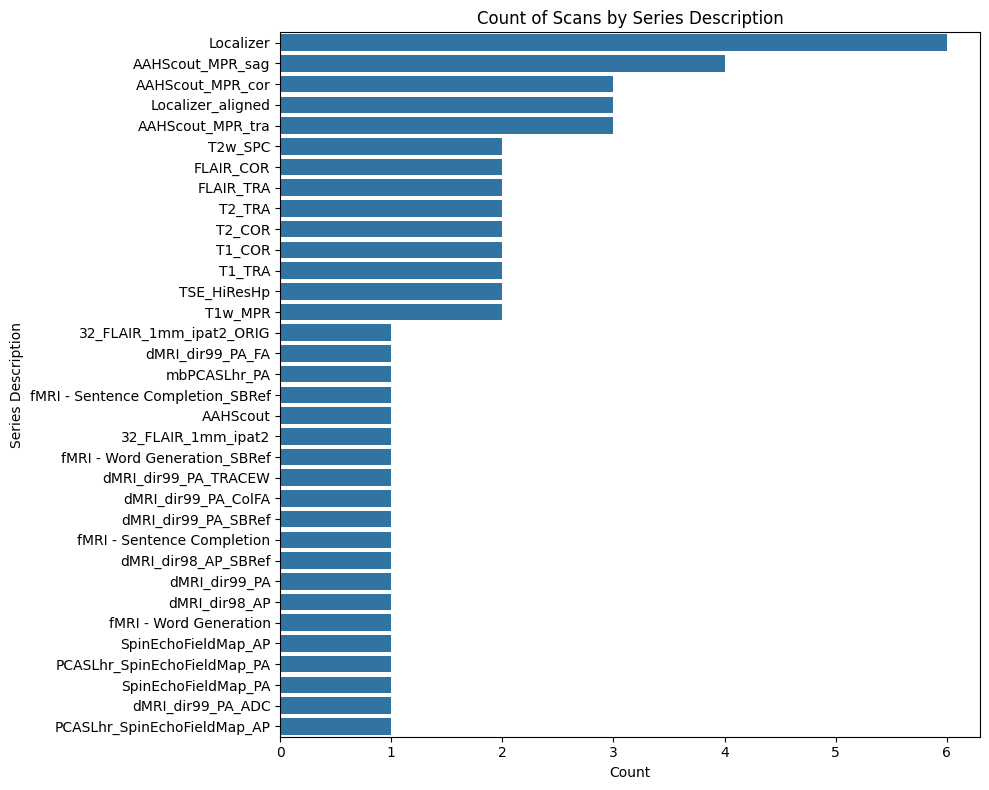

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y='SeriesDescription', data=df, order = df['SeriesDescription'].value_counts().index)
plt.title('Count of Scans by Series Description')
plt.xlabel('Count')
plt.ylabel('Series Description')
plt.tight_layout()
plt.show()